<a href="https://colab.research.google.com/github/tarini-py/netflix-case-study/blob/main/1_Netflix_Case_Study_Scaler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv

Downloading...
From: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
To: /content/netflix.csv
100% 3.40M/3.40M [00:00<00:00, 43.6MB/s]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('netflix.csv')
data=df.copy(deep=True)

In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [ ]:
df['title'].nunique()

8807

# **Un-nesting the columns that contain comma separated values**

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


These columns contain comma that i want to separate and make one row for each value

In [ ]:
columns=df.columns[[3,4,5,10]]
columns

Index(['director', 'cast', 'country', 'listed_in'], dtype='object')

In [ ]:
for i in columns:
  print(i)
  df[i]=df[i].str.split(',')
  df=df.explode(i)

director
cast
country
listed_in


all comma separated values are un-nested

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Ama Qamata,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,NaN,Khosi Ngema,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,"March 2, 2019",2015,TV-14,111 min,Music & Musicals,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,Dramas,A scrappy but poor boy worms his way into a ty...
8806,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,"March 2, 2019",2015,TV-14,111 min,International Movies,A scrappy but poor boy worms his way into a ty...


In [ ]:
df.shape,data.shape

((202065, 12), (8807, 12))

# **Handling null values **

---



# **Which coulumns has how many null values**

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,50643
cast,2149
country,11897
date_added,158
release_year,0
rating,67
duration,3


In [ ]:
for i in df.columns:
    null_rate = df[i].isna().sum() / len(df) * 100
    if null_rate > 0 :
        print("{} null rate: {}%".format(i,round(null_rate,2)))

director null rate: 25.06%
cast null rate: 1.06%
country null rate: 5.89%
date_added null rate: 0.08%
rating null rate: 0.03%
duration null rate: 0.0%


In [ ]:
df.fillna({'director':'Unknown Director',
           'country':'Unknown Country',
           'cast':'Unknown Actor',
           'rating':'Unknown Rating',
           'duration':'Unknown Duration'
           },inplace=True)

In [ ]:
df.isna().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,158
release_year,0
rating,0
duration,0


Convert date_added column from object to datetime[ns]

In [ ]:
df['date_added']=df['date_added'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202065 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       202065 non-null  object        
 1   type          202065 non-null  object        
 2   title         202065 non-null  object        
 3   director      202065 non-null  object        
 4   cast          202065 non-null  object        
 5   country       202065 non-null  object        
 6   date_added    201907 non-null  datetime64[ns]
 7   release_year  202065 non-null  int64         
 8   rating        202065 non-null  object        
 9   duration      202065 non-null  object        
 10  listed_in     202065 non-null  object        
 11  description   202065 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 20.0+ MB


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Dramas,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2 Seasons,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
1,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2 Seasons,International TV Shows,"After crossing paths at a party, a Cape Town t..."


In [ ]:
movies=df[df['type']=='Movie']
tv_shows=df[df['type']=='TV Show']

In [ ]:
movies.nunique()

,0
show_id,6131
type,1
title,6131
director,4887
cast,27880
country,188
date_added,1533
release_year,73
rating,18
duration,206


In [ ]:
tv_shows.nunique()

,0
show_id,2676
type,1
title,2676
director,301
cast,15502
country,103
date_added,1012
release_year,46
rating,10
duration,15


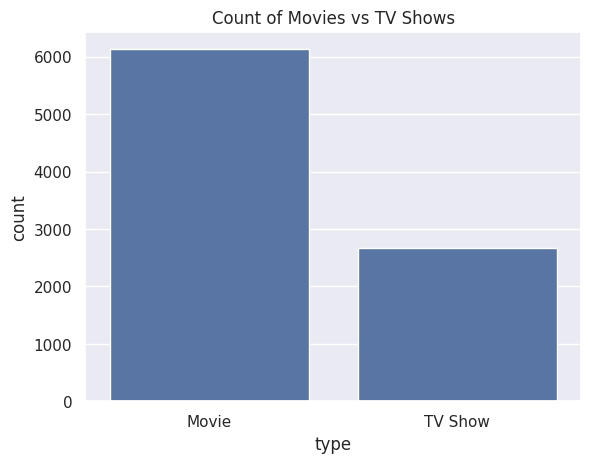

In [ ]:
sns.set(style="darkgrid")
sns.countplot(data=data,x='type')
plt.title('Count of Movies vs TV Shows')
plt.show()

In [ ]:
data[data['type']=='Movie']['rating'].value_counts()

,count
rating,
TV-MA,2062
TV-14,1427
R,797
TV-PG,540
PG-13,490
PG,287
TV-Y7,139
TV-Y,131
TV-G,126


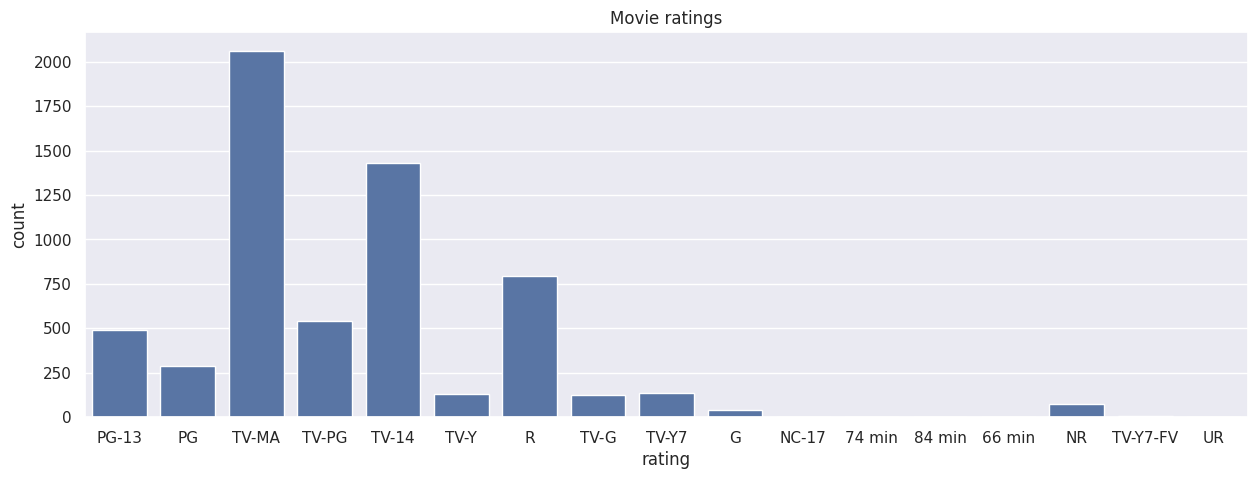

In [ ]:
plt.figure(figsize=(15,5))
sns.set(style="darkgrid")
plt.title('Movie ratings')
sns.countplot(data=data[data['type']=='Movie'],x='rating')
plt.show()

In [ ]:
data[data['type']=='TV Show']['rating'].value_counts()

,count
rating,
TV-MA,1145
TV-14,733
TV-PG,323
TV-Y7,195
TV-Y,176
TV-G,94
NR,5
R,2
TV-Y7-FV,1


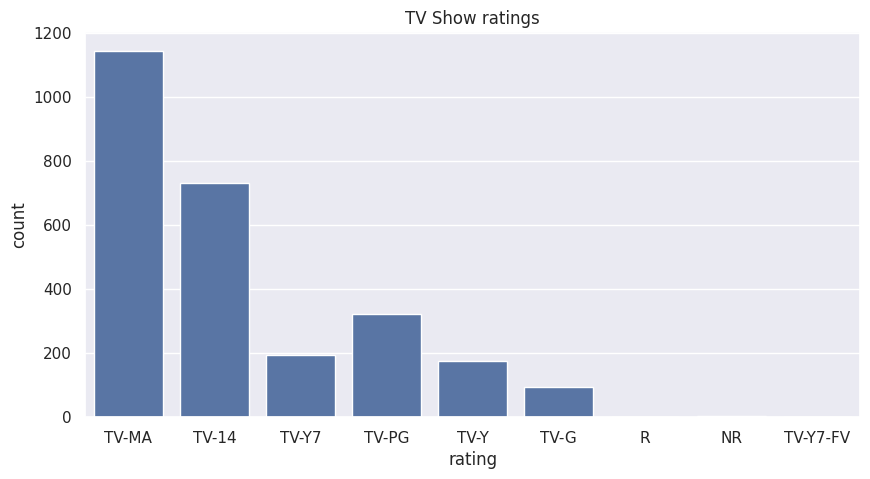

In [ ]:
plt.figure(figsize=(10,5))
sns.set(style="darkgrid")
plt.title('TV Show ratings')
sns.countplot(data=data[data['type']=='TV Show'],x='rating')
plt.show()

In [ ]:
df['country'].value_counts().head(10)

,count
country,
United States,49868
India,22139
Unknown Country,11897
United Kingdom,9733
United States,9482
Japan,7317
South Korea,4628
Canada,4395
Spain,4255


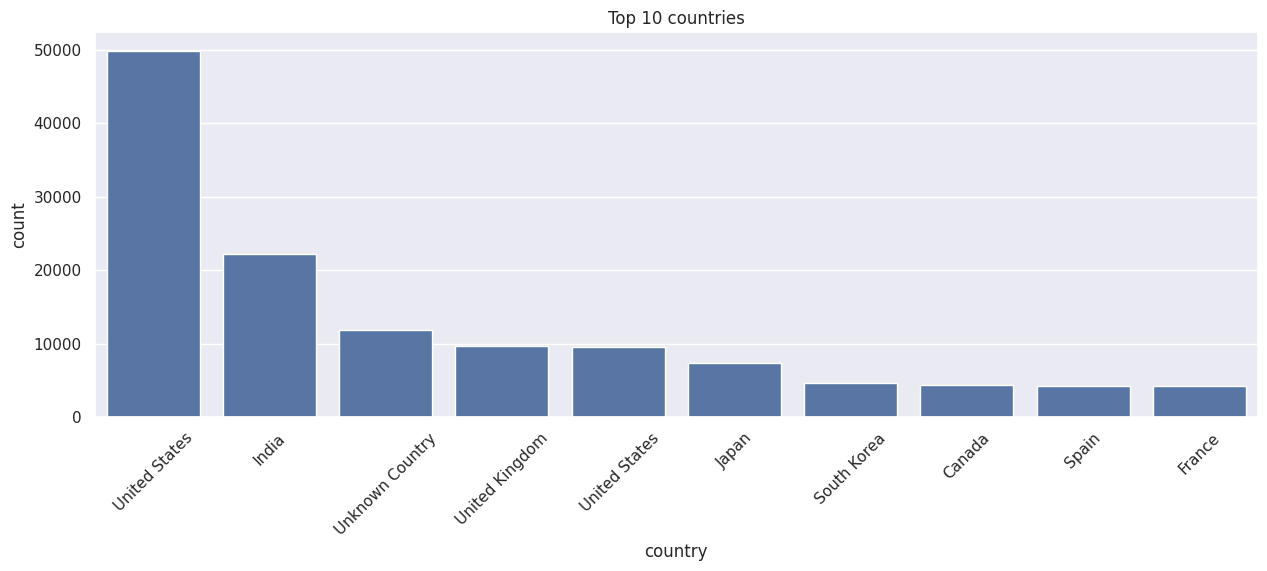

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title('Top 10 countries')
sns.set(style="darkgrid")
sns.barplot(data=df['country'].value_counts().head(10).reset_index(),x='country',y='count')
plt.show()

In [ ]:
US_data=df[df['country']=='United States']
IN_data=df[df['country']=='India']

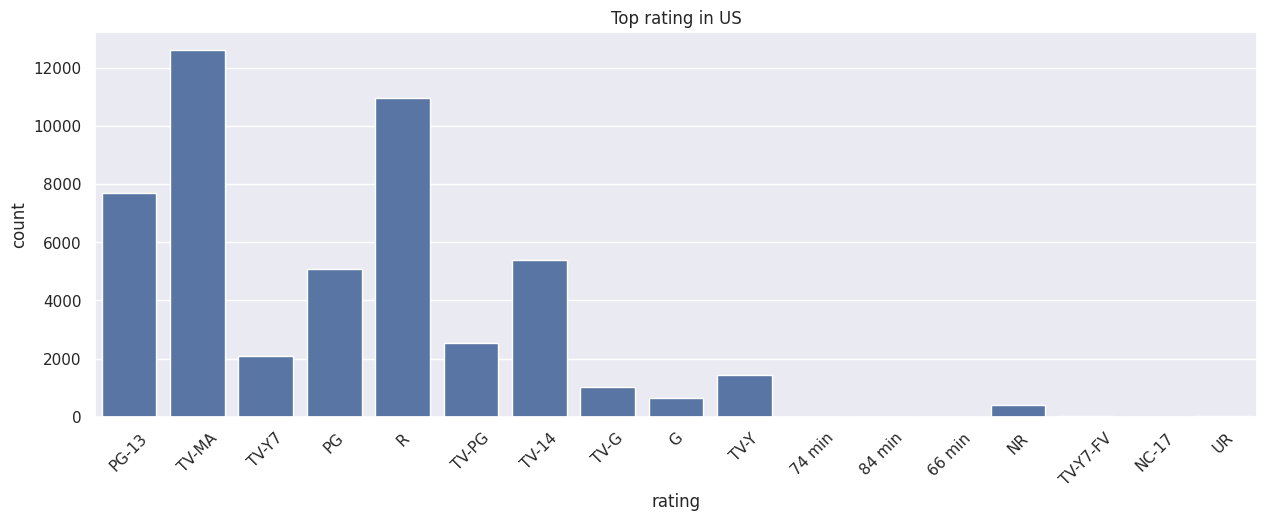

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
plt.title('Top rating in US')
sns.set(style="darkgrid")
sns.countplot(data=US_data,x='rating')
plt.show()

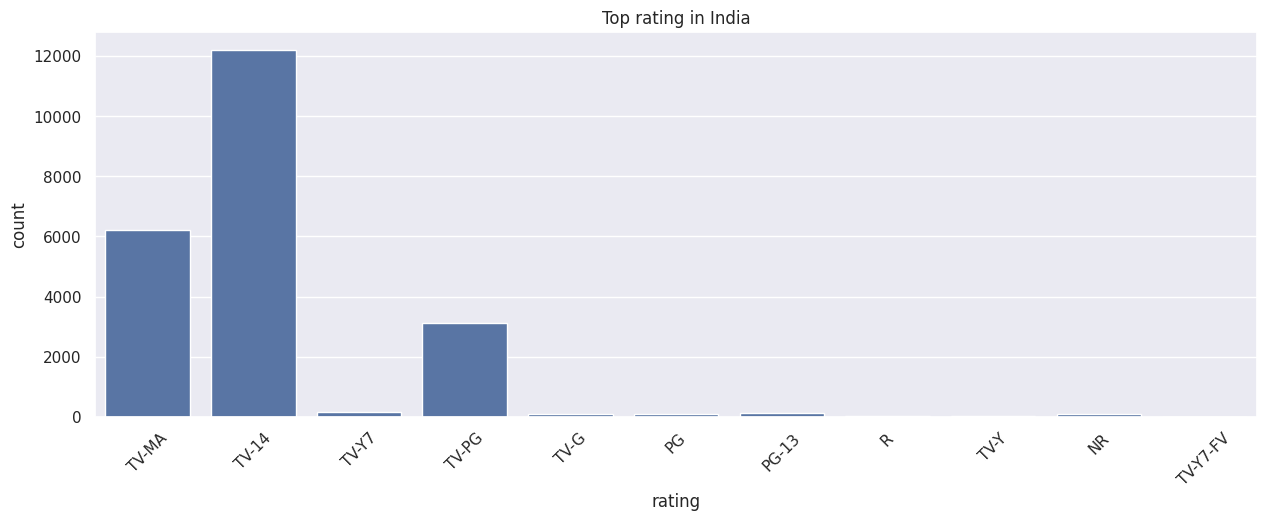

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top rating in India')
sns.countplot(data=IN_data,x='rating')
plt.show()

In [ ]:
movies.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,2364
India,927
Unknown Country,440
United States,388
United Kingdom,382
Canada,187
France,155
United Kingdom,152
France,148


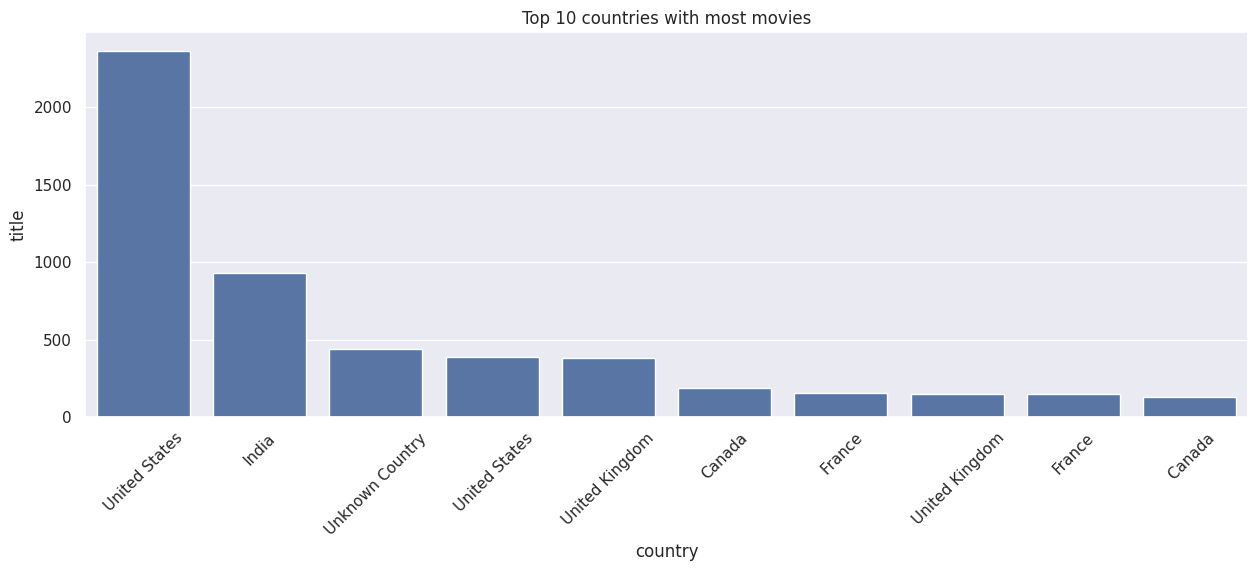

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 10 countries with most movies')
sns.barplot(data=movies.groupby('country')['title'].nunique().sort_values(ascending=False).head(10).reset_index(),x='country',y='title')
plt.show()

In [ ]:
tv_shows.groupby('country')['title'].nunique().sort_values(ascending=False).head(10)

,title
country,
United States,847
Unknown Country,391
United Kingdom,246
Japan,174
South Korea,164
United States,91
Canada,84
India,81
Taiwan,70


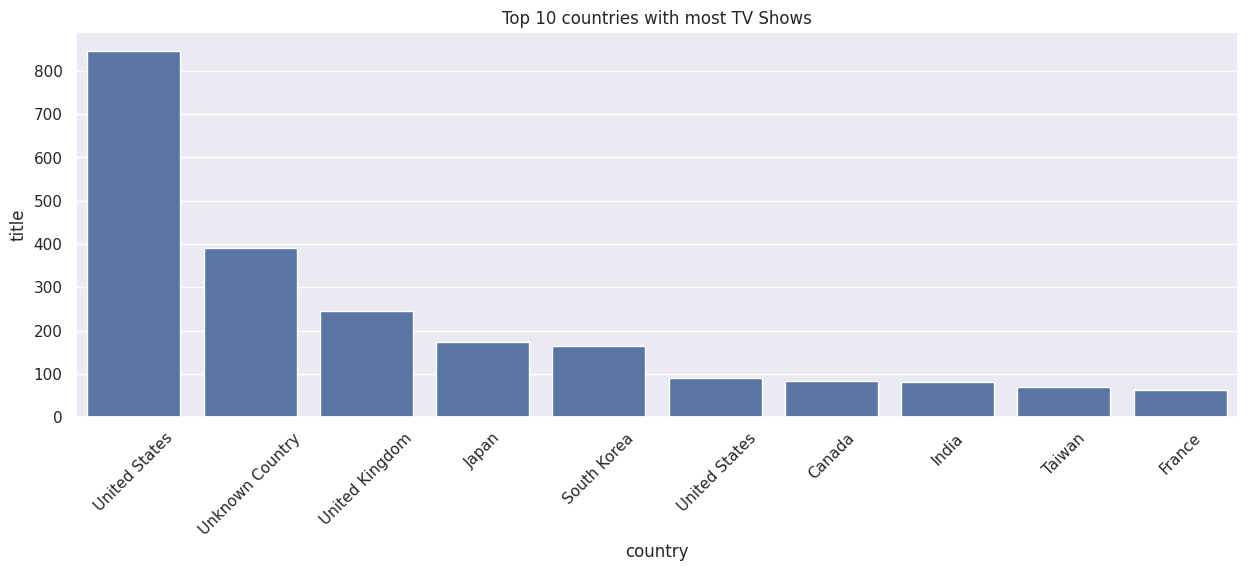

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 10 countries with most TV Shows')
sns.barplot(data=tv_shows.groupby('country')['title'].nunique().sort_values(ascending=False).head(10).reset_index(),x='country',y='title')
plt.show()

In [ ]:
data['date_added']=data['date_added'].astype('datetime64[ns]')

In [ ]:
data['month']=data['date_added'].dt.month_name()
data['year']=data['date_added'].dt.year
data['date']=data['date_added'].dt.day
data['day']=data['date_added'].dt.day_name()
data['week']=data['date_added'].dt.isocalendar().week

In [ ]:
data[data['type']=='Movie']['week'].value_counts().head(10)

,count
week,
1,316
44,243
40,215
9,207
26,195
35,189
31,185
13,174
18,173


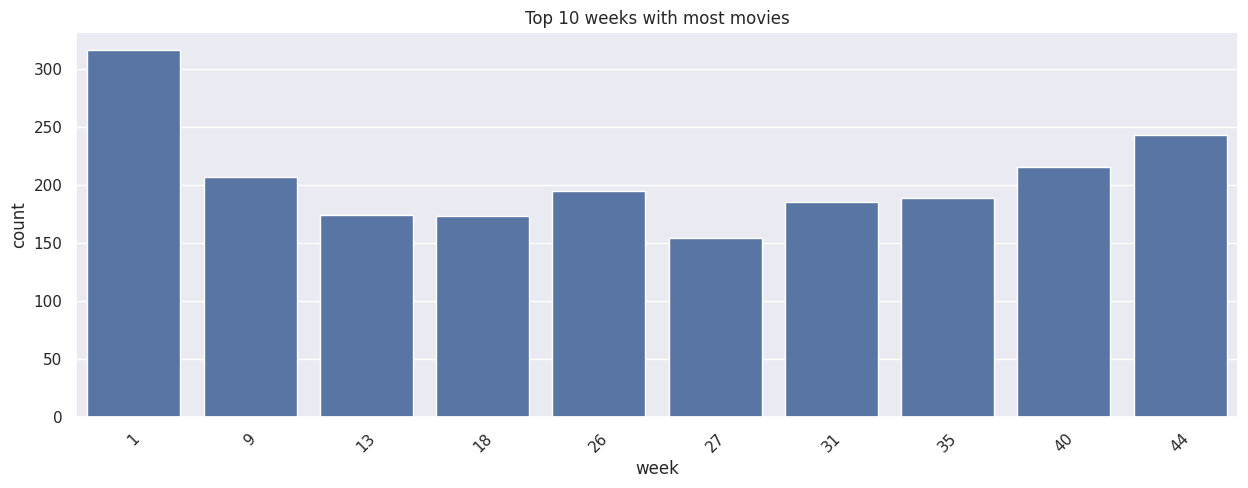

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 10 weeks with most movies')
sns.barplot(data=data[data['type']=='Movie']['week'].value_counts().head(10).reset_index(),x='week',y='count')
plt.show()

In [ ]:
data[data['type']=='TV Show']['week'].value_counts().head(10)

,count
week,
27,86
31,83
13,76
44,75
24,75
35,74
5,73
26,73
40,72


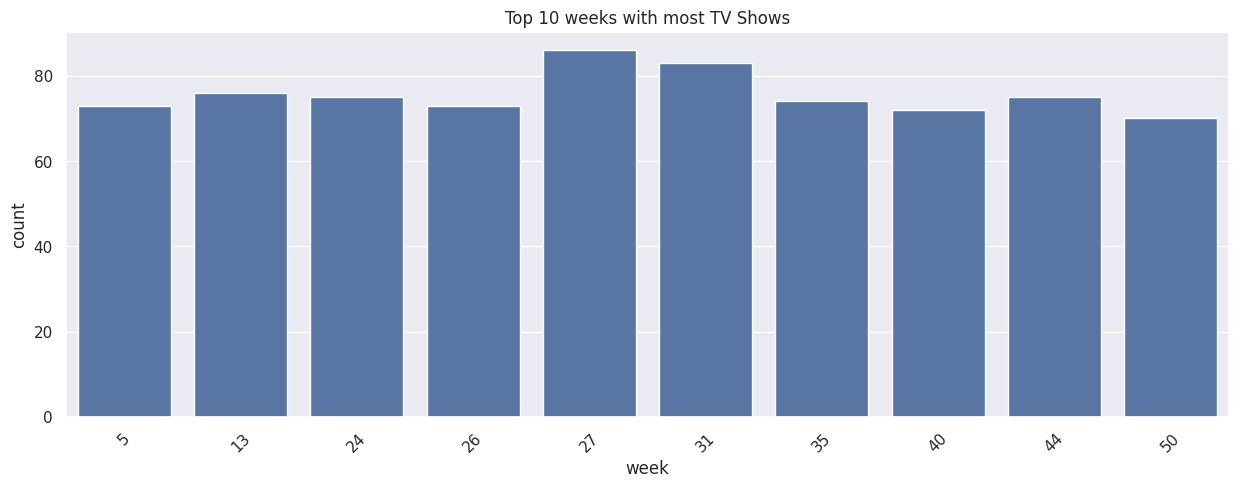

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 10 weeks with most TV Shows')
sns.barplot(data=data[data['type']=='TV Show']['week'].value_counts().head(10).reset_index(),x='week',y='count')
plt.show()

In [ ]:
data[data['type']=='Movie']['month'].value_counts().head(12)

,count
month,
July,565
April,550
December,547
January,546
October,545
March,529
September,519
August,519
November,498


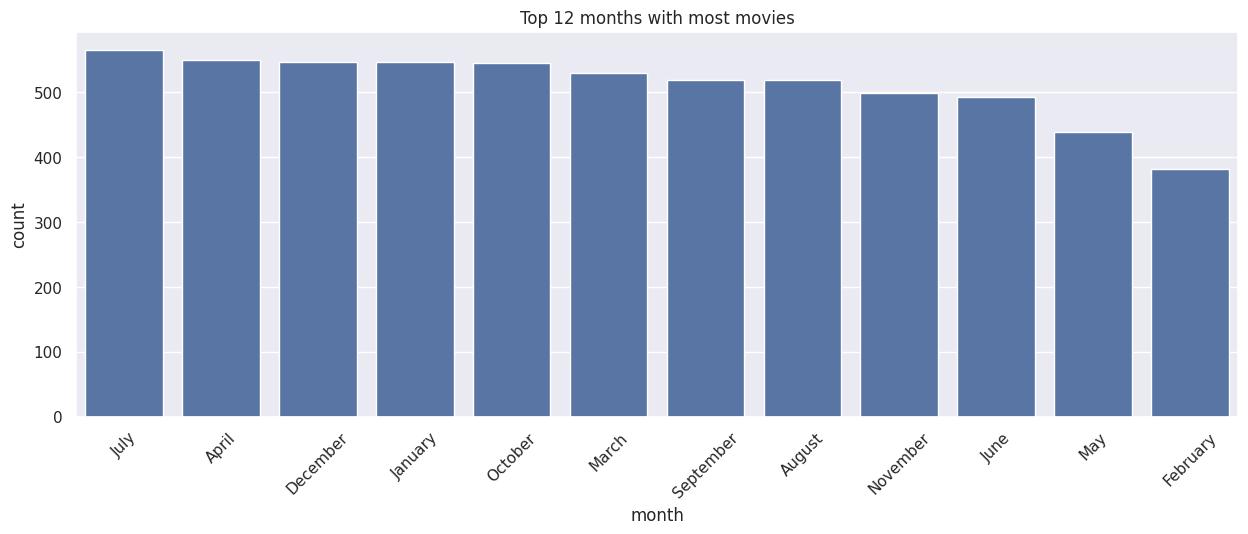

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 12 months with most movies')
sns.barplot(data=data[data['type']=='Movie']['month'].value_counts().head(12).reset_index(),x='month',y='count')
plt.show()

In [ ]:
data[data['type']=='TV Show']['month'].value_counts().head(12)

,count
month,
December,266
July,262
September,251
August,236
June,236
October,215
April,214
March,213
November,207


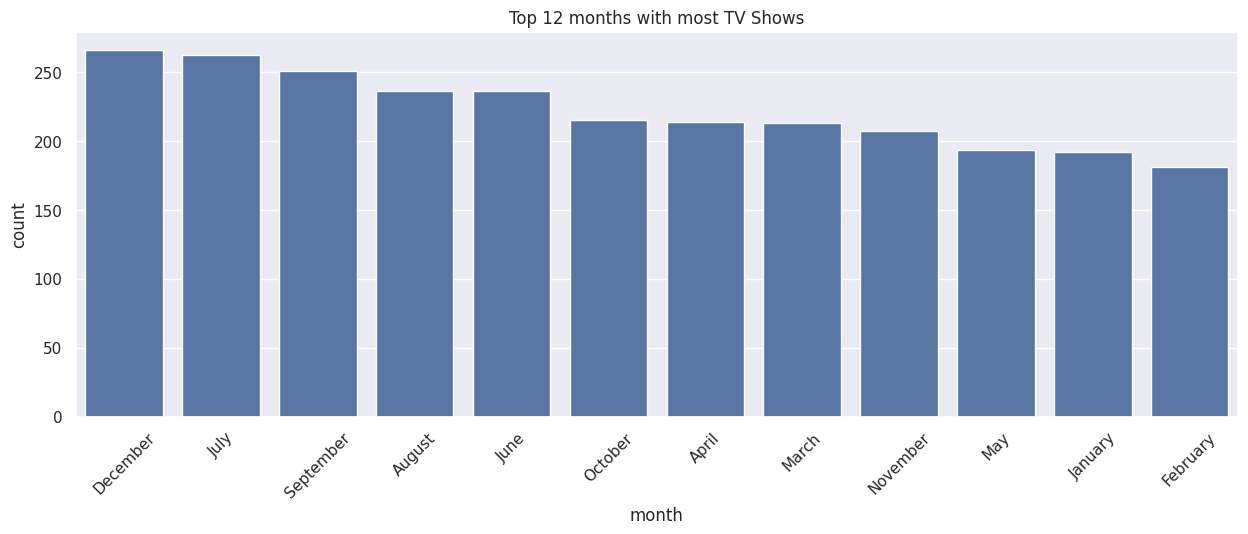

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
plt.title('Top 12 months with most TV Shows')
sns.barplot(data=data[data['type']=='TV Show']['month'].value_counts().head(12).reset_index(),x='month',y='count')
plt.show()

In [ ]:
data['director'].value_counts().head(10)

,count
director,
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Martin Scorsese,12
Youssef Chahine,12
Jay Chapman,12


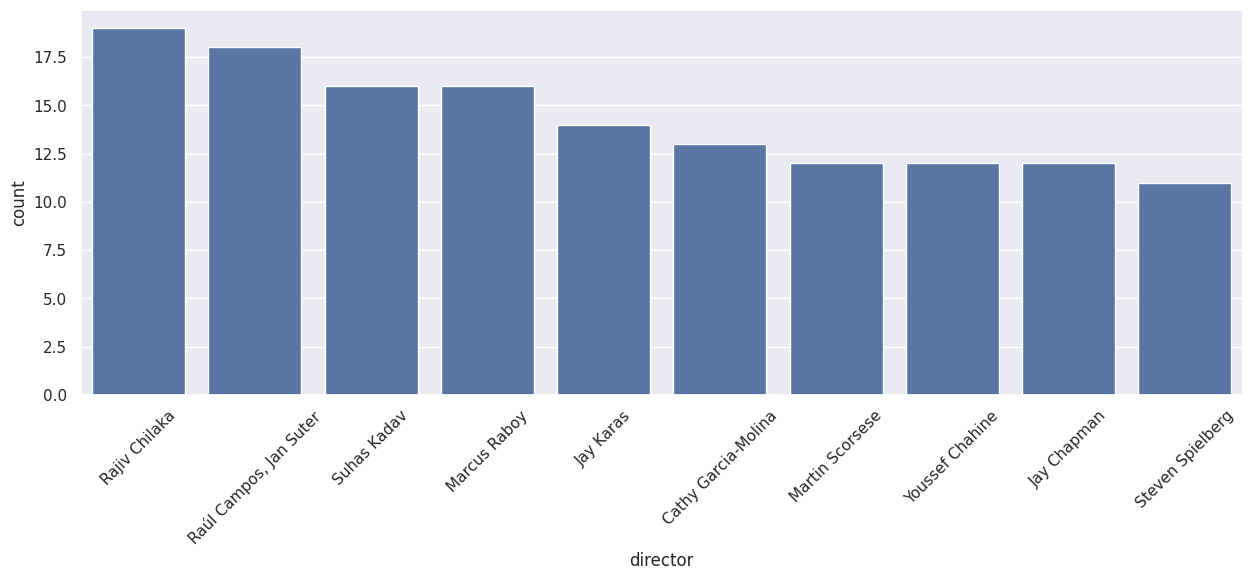

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
sns.barplot(data=data['director'].value_counts().head(10).reset_index(),x='director',y='count')
plt.show()

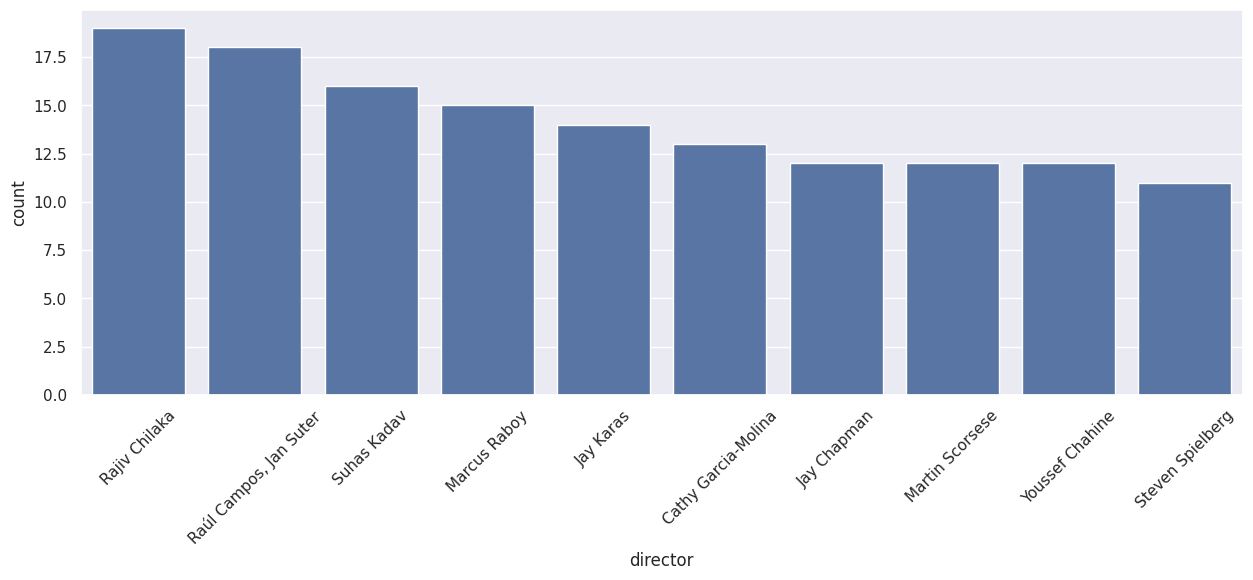

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
sns.barplot(data=data[data['type']=='Movie']['director'].value_counts().head(10).reset_index(),x='director',y='count')
plt.show()

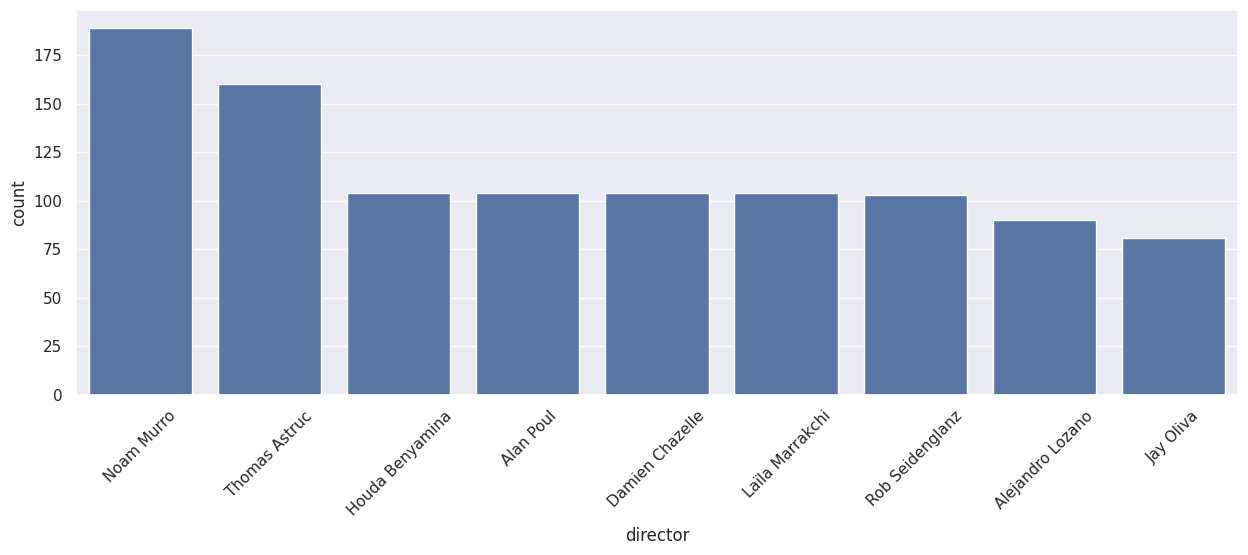

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
sns.barplot(data=df[df['type']=='TV Show']['director'].value_counts().head(10).reset_index().iloc[1:,:],x='director',y='count')
plt.show()

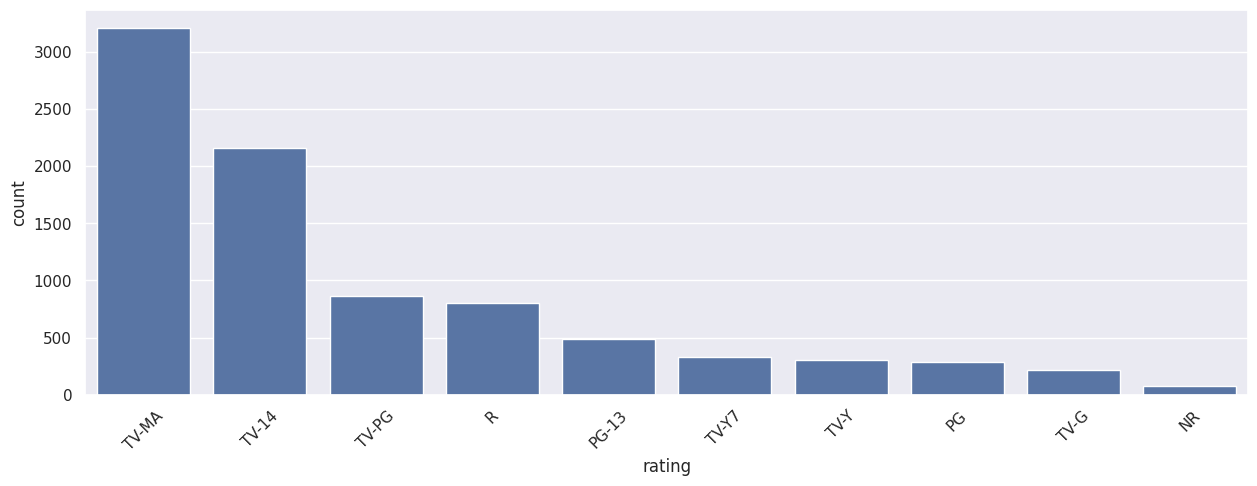

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=45)
sns.set(style="darkgrid")
sns.barplot(data=data['rating'].value_counts().head(10).reset_index(),x='rating',y='count')
plt.show()

In [ ]:
data['date_diff']=(data['date_added']-pd.to_datetime(data['release_year'],format="%Y")).dt.days

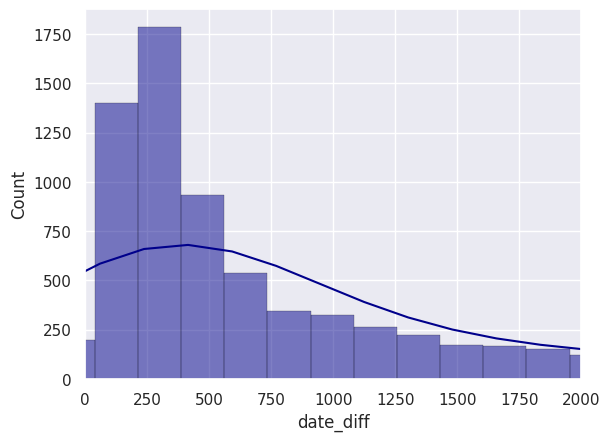

In [ ]:
sns.set(style="darkgrid")
sns.histplot(data['date_diff'],color='darkblue', edgecolor='black',kde=True)
plt.xlim(0,2000)
plt.show()

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
df['listed_in'].value_counts().reset_index().head(10)

,listed_in,count
0,International Movies,27141
1,Dramas,19657
2,Comedies,13894
3,Action & Adventure,12216
4,Dramas,10149
5,Independent Movies,9564
6,Children & Family Movies,9294
7,TV Dramas,7956
8,International TV Shows,7065
9,Comedies,6935


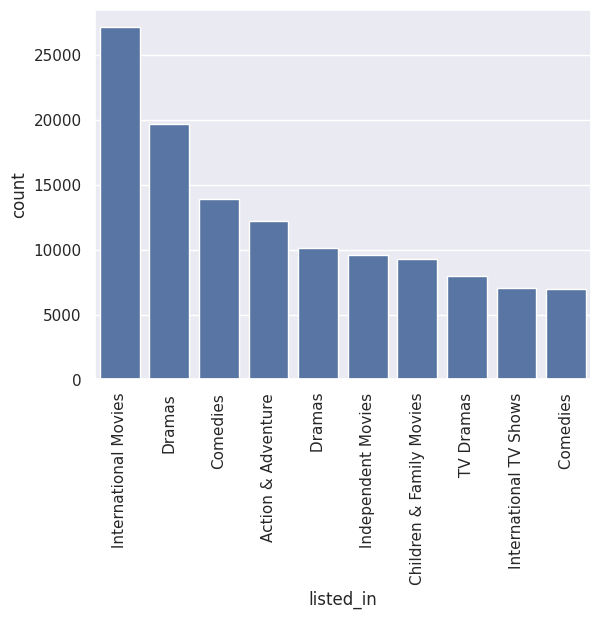

In [ ]:
sns.barplot(data=df['listed_in'].value_counts().reset_index().head(10),x='listed_in',y='count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df['type']=='Movie']['listed_in'].value_counts().reset_index().head(10)

,listed_in,count
0,International Movies,27141
1,Dramas,19657
2,Comedies,13894
3,Action & Adventure,12216
4,Dramas,10149
5,Independent Movies,9564
6,Children & Family Movies,9294
7,Comedies,6935
8,Romantic Movies,6392
9,Thrillers,6283


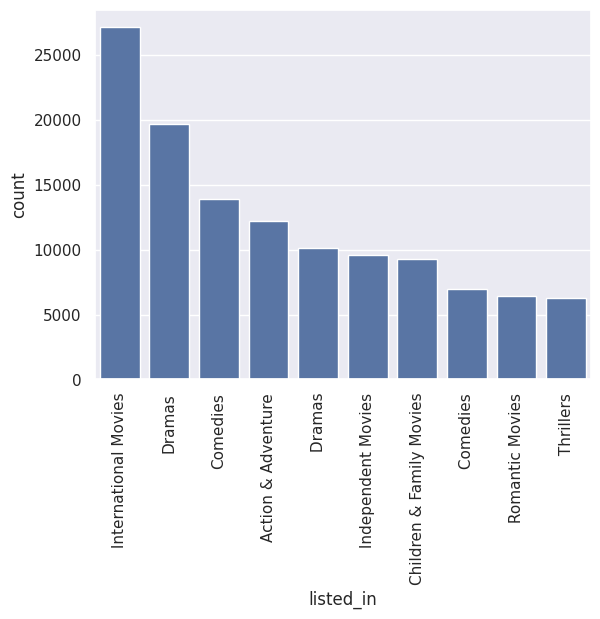

In [ ]:
sns.barplot(data=df[df['type']=='Movie']['listed_in'].value_counts().reset_index().head(10),x='listed_in',y='count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df[df['type']=='TV Show']['listed_in'].value_counts().reset_index().head(10)

,listed_in,count
0,TV Dramas,7956
1,International TV Shows,7065
2,International TV Shows,5780
3,Crime TV Shows,4020
4,Kids' TV,3809
5,TV Comedies,3768
6,Romantic TV Shows,2729
7,Anime Series,2313
8,Spanish-Language TV Shows,2088
9,British TV Shows,1808


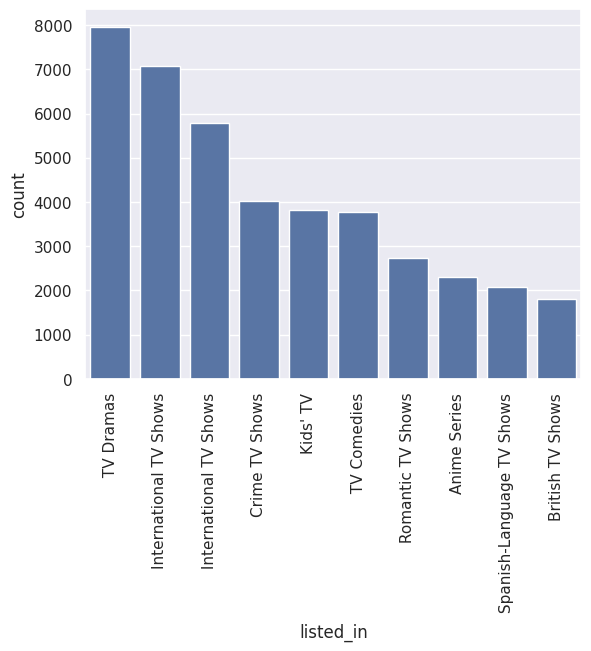

In [ ]:
sns.barplot(data=df[df['type']=='TV Show']['listed_in'].value_counts().reset_index().head(10),x='listed_in',y='count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'month', 'year', 'date', 'day', 'week', 'date_diff'],
      dtype='object')

In [ ]:
data.year.min(),data.year.max()

(2008.0, 2021.0)

In [ ]:
data.groupby('year')['title'].count().reset_index()

,year,title
0,2008.0,2
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,11
6,2014.0,24
7,2015.0,82
8,2016.0,429
9,2017.0,1188


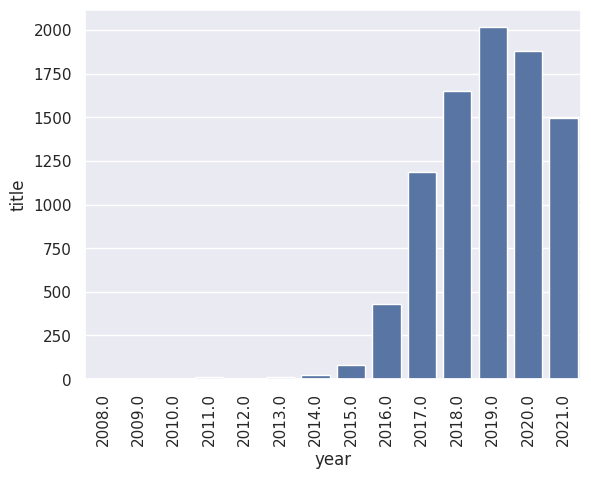

In [ ]:
sns.barplot(data=data.groupby('year')['title'].count().reset_index(),x='year',y='title')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[data['type']=='Movie'].groupby('year')['title'].count().reset_index()

,year,title
0,2008.0,1
1,2009.0,2
2,2010.0,1
3,2011.0,13
4,2012.0,3
5,2013.0,6
6,2014.0,19
7,2015.0,56
8,2016.0,253
9,2017.0,839


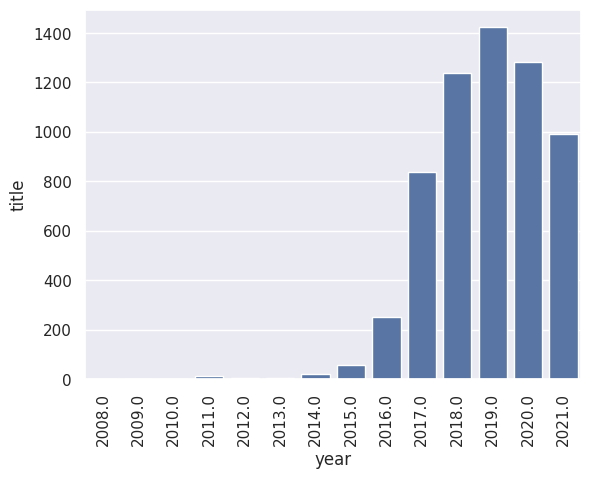

In [ ]:
sns.barplot(data=data[data['type']=='Movie'].groupby('year')['title'].count().reset_index(),x='year',y='title')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data[data['type']=='TV Show'].groupby('year')['title'].count().reset_index()

,year,title
0,2008.0,1
1,2013.0,5
2,2014.0,5
3,2015.0,26
4,2016.0,176
5,2017.0,349
6,2018.0,412
7,2019.0,592
8,2020.0,595
9,2021.0,505


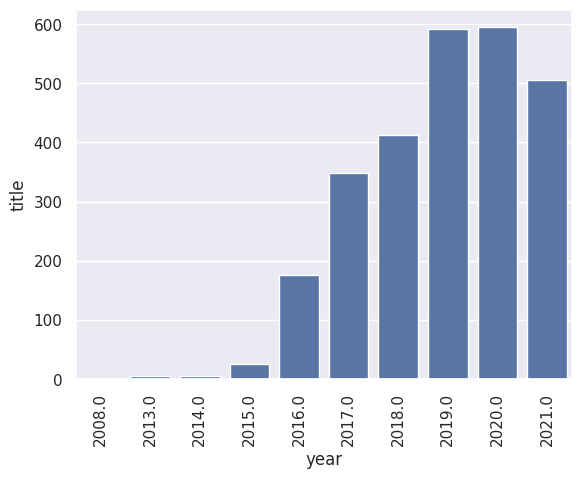

In [ ]:
sns.barplot(data=data[data['type']=='TV Show'].groupby('year')['title'].count().reset_index(),x='year',y='title')
plt.xticks(rotation=90)
plt.show()

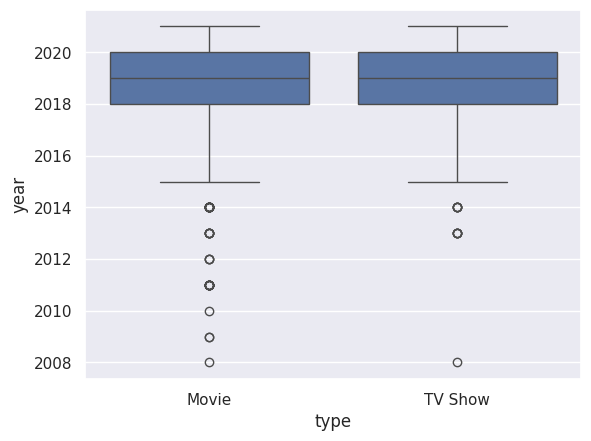

In [ ]:
sns.boxplot(data=data,x='type',y='year')
plt.show()